In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os, sys

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, brier_score_loss, log_loss

from xgboost import XGBClassifier

DATA_PATH_2023 = "../../data/matches-processed/cs2/tabular/2023/"
DATA_PATH_2024 = "../../data/matches-processed/cs2/tabular/2024/"

In [2]:
file_list_2023 = [f for f in os.listdir(DATA_PATH_2023) if f.endswith("dem_df.csv")]
file_list_2024 = [f for f in os.listdir(DATA_PATH_2024) if f.endswith("dem_df.csv")][:48]
df = None

for file in file_list_2023:
    if df is None:
        df = pd.read_csv(DATA_PATH_2023 + file)
    else:
        df = pd.concat([df, pd.read_csv(DATA_PATH_2023 + file)])
    print(f"Loaded {file}")

for file in file_list_2024:
    if df is None:
        df = pd.read_csv(DATA_PATH_2024 + file)
    else:
        df = pd.concat([df, pd.read_csv(DATA_PATH_2024 + file)])
    print(f"Loaded {file}")

Loaded 100000_blast-premier-fall-final-2023-cloud9-vs-heroic-bo3-FZhx5bice3pWss26wFHIIYcloud9-vs-heroic-m2-inferno.dem_df.csv
Loaded 100001_blast-premier-fall-final-2023-cloud9-vs-natus-vincere-bo3-vxKYiMWUPLiYn9oyBq6Njdcloud9-vs-natus-vincere-m3-inferno.dem_df.csv
Loaded 100002_blast-premier-fall-final-2023-vitality-vs-cloud9-bo3-zUIRb7v6M6zsMG7pZgHbMivitality-vs-cloud9-m3-inferno.dem_df.csv
Loaded 100003_blast-premier-fall-final-2023-vitality-vs-complexity-bo3-G-ZaUjuZ52TPMUhj947hGqvitality-vs-complexity-m3-inferno.dem_df.csv
Loaded 100004_blast-premier-fall-final-2023-vitality-vs-heroic-bo3-9zNsp9vKgCG5KpvZtTZn8yvitality-vs-heroic-m2-inferno.dem_df.csv
Loaded 100005_blast-premier-world-final-2023-cloud9-vs-vitality-bo3-GcqYdsbe4wbDz8TrHeGg0Tcloud9-vs-vitality-m2-inferno.dem_df.csv
Loaded 100006_blast-premier-world-final-2023-faze-vs-g2-bo3-q1sdE-eIVJR3iWA1ZMZkolfaze-vs-g2-m1-inferno.dem_df.csv
Loaded 100007_blast-premier-world-final-2023-faze-vs-vitality-bo3-ClpxEnxu3aH1RMZr76QdPjfa

C:\Users\szmid\AppData\Local\Temp\ipykernel_26284\2118775293.py:9: DtypeWarning: Columns (1677,1678) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(DATA_PATH_2023 + file)])


Loaded 100010_cs-asia-championships-2023-lynn-vision-vs-mouz-bo3-3RlytQH2i-PbQZF2hly2t3lynn-vision-vs-mouz-m2-inferno.dem_df.csv


C:\Users\szmid\AppData\Local\Temp\ipykernel_26284\2118775293.py:9: DtypeWarning: Columns (1677,1678) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(DATA_PATH_2023 + file)])


Loaded 100011_cs-asia-championships-2023-mouz-vs-wings-up-inferno-rBbDAQbfvHTcx042LMx-mOmouz-vs-wings-up-inferno.dem_df.csv
Loaded 100012_iem-sydney-2023-gamerlegion-vs-faze-bo3-8GCYTI5P5NZCLcg9Xq9-bagamerlegion-vs-faze-m2-inferno.dem_df.csv
Loaded 100012_iem-sydney-2023-mouz-vs-vertex-inferno-wyV4hHh3mDqNZhY8zBC_ttmouz-vs-vertex-inferno.dem_df.csv
Loaded 100012_iem-sydney-2023-natus-vincere-vs-mouz-bo3-kmz24m_e2rc4e07yRHJsFcnatus-vincere-vs-mouz-m2-inferno.dem_df.csv
Loaded 100012_iem-sydney-2023-vitality-vs-faze-bo3-KYy8n7ELEDs3OUXK1CHiYpvitality-vs-faze-m2-inferno.dem_df.csv
Loaded 100012_roobet-cup-2023-fnatic-vs-ninjas-in-pyjamas-bo3-vvaeYNK3nyhj-S-LM5M0XFfnatic-vs-ninjas-in-pyjamas-m1-inferno.dem_df.csv
Loaded 100013_roobet-cup-2023-movistar-riders-vs-9z-bo3-BJXqYVFljEe0r6OFEd3Q3fmovistar-riders-vs-9z-m3-inferno.dem_df.csv
Loaded 100014_roobet-cup-2023-og-vs-fnatic-bo3-dOx3-3kXMqUOqAbeTpUgeTog-vs-fnatic-m3-inferno.dem_df.csv
Loaded 100015_thunderpick-world-championship-2023-cloud

In [3]:
val_list_2024 = [f for f in os.listdir(DATA_PATH_2024) if f.endswith("dem_df.csv")][48:]
val_df = None

for file in file_list_2024:
    if val_df is None:
        val_df = pd.read_csv(DATA_PATH_2024 + file)
    else:
        val_df = pd.concat([val_df, pd.read_csv(DATA_PATH_2024 + file)])
    print(f"Loaded {file}")

Loaded _betboom-dacha-belgrade-season-2-eternal-fire-vs-pain-bo3-EsO1ghXhDey0Ii85scyL6seternal-fire-vs-pain-m1-inferno.dem_df.csv
Loaded _betboom-dacha-belgrade-season-2-mouz-vs-eternal-fire-bo3-5Hd0ELRRmki7NgbHcMS0LRmouz-vs-eternal-fire-m1-inferno.dem_df.csv
Loaded _betboom-dacha-belgrade-season-2-virtuspro-vs-furia-bo3-L9mXEKkAd1k6NSuXJ6zD7Mvirtus-pro-vs-furia-m1-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-astralis-vs-ninjas-in-pyjamas-bo3-K9s9BWKc9ebp95rNa21UfDastralis-vs-ninjas-in-pyjamas-m2-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-faze-vs-cloud9-bo3-ihmdAcNeCnnXz-kUWDRQWJfaze-vs-cloud9-m2-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-faze-vs-ninjas-in-pyjamas-bo3-VdTvo-LqKO90fOrCjapEhefaze-vs-ninjas-in-pyjamas-m2-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-g2-vs-ninjas-in-pyjamas-bo3-bsSNzyWjPgDwlpAr3Kr3P4g2-vs-ninjas-in-pyjamas-m2-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-g2-vs-ninjas-in-pyjamas-bo3-hHMaTSGC

In [4]:
drop_columns = [
    "CT0_name", "CT1_name", "CT2_name", "CT3_name", "CT4_name", 
    "T5_name", "T6_name", "T7_name", "T8_name", "T9_name",
    "UNIVERSAL_tick", "UNIVERSAL_freeze_end", "UNIVERSAL_end",
    "MATCH_ID", "UNIVERSAL_CT_clan_name", "UNIVERSAL_T_clan_name", "TOKEN"
]
df = df.drop(columns=drop_columns)
val_df = val_df.drop(columns=drop_columns)
df

,CT0_X,CT0_Y,CT0_Z,CT0_pitch,CT0_yaw,CT0_velocity_X,CT0_velocity_Y,CT0_velocity_Z,CT0_health,CT0_armor_value,...,UNIVERSAL_bomb_Z,UNIVERSAL_bomb_mx_pos1,UNIVERSAL_bomb_mx_pos2,UNIVERSAL_bomb_mx_pos3,UNIVERSAL_bomb_mx_pos4,UNIVERSAL_bomb_mx_pos5,UNIVERSAL_bomb_mx_pos6,UNIVERSAL_bomb_mx_pos7,UNIVERSAL_bomb_mx_pos8,UNIVERSAL_bomb_mx_pos9
0,2353.0000,1977.0000,135.51888,1.254150,110.62167,0.000000,0.00000,0.000000,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,2342.5542,2004.6554,135.21591,1.400421,110.85138,-65.468750,172.92969,-1.734375,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2322.3958,2057.4460,134.93059,9.237793,113.75656,-87.890625,227.42188,0.888672,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,2295.6170,2113.7646,134.14221,30.221329,126.54739,-121.140625,218.68750,-8.030273,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,2261.7131,2166.3320,169.65921,31.057312,125.50232,-128.125000,216.65625,189.485350,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,1773.3394,2584.4114,169.93935,6.972534,129.82270,181.421880,185.29688,-248.797850,100.0,100.0,...,0.0,0,0,0,0,0,0,0,0,0
7327,1802.9270,2624.8655,132.73155,3.894318,169.97980,39.585938,155.48438,0.000000,100.0,100.0,...,0.0,0,0,0,0,0,0,0,0,0
7328,1800.8307,2670.8035,132.73155,3.031540,-171.92401,-64.625000,185.03125,0.000000,100.0,100.0,...,0.0,0,0,0,0,0,0,0,0,0
7329,1781.7534,2719.4550,132.73155,1.399048,-171.38740,-117.796875,177.57812,0.000000,100.0,100.0,...,0.0,0,0,0,0,0,0,0,0,0


In [5]:
# Split the data into training and test sets
X_train = df.drop(columns=["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID"])
y_train = df["UNIVERSAL_CT_wins"].values

X_test = val_df.drop(columns=["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID"])
y_test = val_df["UNIVERSAL_CT_wins"].values

In [49]:
list(df.columns)[1000:]

['T6_is_alive',
 'T6_is_CT',
 'T6_is_shooting',
 'T6_is_crouching',
 'T6_is_ducking',
 'T6_is_duck_jumping',
 'T6_is_walking',
 'T6_is_spotted',
 'T6_is_scoped',
 'T6_is_defusing',
 'T6_is_reloading',
 'T6_is_in_bombsite',
 'T6_zoom_lvl',
 'T6_velo_modifier',
 'T6_stat_kills',
 'T6_stat_HS_kills',
 'T6_stat_opening_kills',
 'T6_stat_MVPs',
 'T6_stat_deaths',
 'T6_stat_opening_deaths',
 'T6_stat_assists',
 'T6_stat_flash_assists',
 'T6_stat_damage',
 'T6_stat_weapon_damage',
 'T6_stat_nade_damage',
 'T6_stat_survives',
 'T6_stat_KPR',
 'T6_stat_ADR',
 'T6_stat_DPR',
 'T6_stat_HS%',
 'T6_stat_SPR',
 'T6_inventory_C4',
 'T6_inventory_Taser',
 'T6_inventory_USP-S',
 'T6_inventory_P2000',
 'T6_inventory_Glock-18',
 'T6_inventory_Dual Berettas',
 'T6_inventory_P250',
 'T6_inventory_Tec-9',
 'T6_inventory_CZ75 Auto',
 'T6_inventory_Five-SeveN',
 'T6_inventory_Desert Eagle',
 'T6_inventory_R8 Revolver',
 'T6_inventory_MAC-10',
 'T6_inventory_MP9',
 'T6_inventory_MP7',
 'T6_inventory_MP5-SD',
 

In [ ]:
keep_columns = [col for col in df.columns if 
    "_inventory_" not in col and
    "_hltv_" not in col and
    "bomb_mx_pos" not in col and
    col not in ["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID", 'UNIVERSAL_round', 'UNIVERSAL_time', 'UNIVERSAL_CT_score', 'UNIVERSAL_T_score', 'UNIVERSAL_CT_losing_streak', 'UNIVERSAL_T_losing_streak',]
]

X_train = df[keep_columns]
y_train = df["UNIVERSAL_CT_wins"].values

X_test = val_df[keep_columns]
y_test = val_df["UNIVERSAL_CT_wins"].values

### Logreg

In [72]:
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, y_train);

In [73]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)

log_loss_value = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
brier_score = brier_score_loss(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Brier Score: {brier_score}")
print(f"ROC AUC: {roc_auc}")

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

Log Loss: 0.45050306730091644
Accuracy: 0.7701982875168994
Precision: 0.7596858309162136
Recall: 0.7497741859942746
F1: 0.7546974667834018
Brier Score: 0.14987432363265835
ROC AUC: 0.7690961765034918
[[184929  49628]
 [ 52358 156885]]


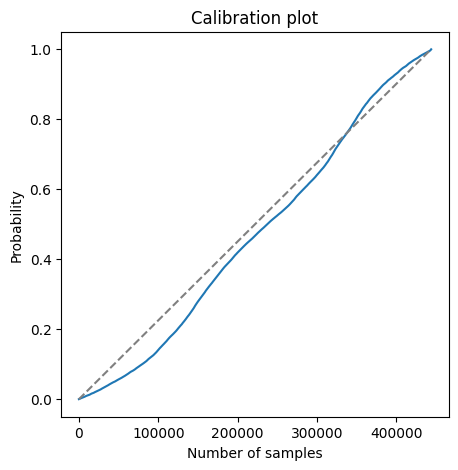

In [74]:
# Get the predicted probabilities in increasing order
cal_array = y_pred_proba[:,1]
cal_array.sort()

fig = plt.figure(figsize=(5, 5))
plt.plot(cal_array)
plt.plot(np.linspace(0, 1, len(cal_array)), linestyle='--', color='gray')
plt.xlabel('Number of samples')
plt.ylabel('Probability')
plt.title('Calibration plot')
plt.show()

### XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.005, n_jobs=8)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=8,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_proba = xgb.predict_proba(X_test)[: , 1]

In [90]:
log_loss_value = log_loss(y_test, y_pred_xgb_proba)
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test.tolist(), y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
brier_score = brier_score_loss(y_test, y_pred_xgb_proba)
roc_auc = roc_auc_score(y_test, y_pred_xgb)

print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Brier Score: {brier_score}")
print(f"ROC AUC: {roc_auc}")

confusion = confusion_matrix(y_test, y_pred_xgb)
print(confusion)

Log Loss: 0.2785911055970013
Accuracy: 0.9355813429472736
Precision: 0.9230099187951333
Recall: 0.9419383205172933
F1: 0.9323780621935441
Brier Score: 0.07817917302107695
ROC AUC: 0.9359243737035662
[[218117  16440]
 [ 12149 197094]]


### Decision tree

In [92]:
dectree = DecisionTreeRegressor(max_depth=4)
dectree.fit(X_train, y_train)
y_pred_dt = dectree.predict(X_test)

In [93]:
log_loss_value = log_loss(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, np.round(y_pred_dt))
precision = precision_score(y_test, np.round(y_pred_dt))
recall = recall_score(y_test, np.round(y_pred_dt))
f1 = f1_score(y_test, np.round(y_pred_dt))
brier_score = brier_score_loss(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)

print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Brier Score: {brier_score}")
print(f"ROC AUC: {roc_auc}")

confusion = confusion_matrix(y_test, np.round(y_pred_dt))
print(confusion)

Log Loss: 0.4923836971055426
Accuracy: 0.7451126633618748
Precision: 0.7169939952142309
Recall: 0.7589596784599724
F1: 0.7373802332303306
Brier Score: 0.16430865235506892
ROC AUC: 0.8323157584689215
[[171874  62683]
 [ 50436 158807]]


### Random forest

In [96]:
rf = RandomForestRegressor(max_depth=5, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [97]:
log_loss_value = log_loss(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, np.round(y_pred_rf))
precision = precision_score(y_test, np.round(y_pred_rf))
recall = recall_score(y_test, np.round(y_pred_rf))
f1 = f1_score(y_test, np.round(y_pred_rf))
brier_score = brier_score_loss(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)

print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Brier Score: {brier_score}")
print(f"ROC AUC: {roc_auc}")

confusion = confusion_matrix(y_test, np.round(y_pred_rf))
print(confusion)

Log Loss: 0.4478702503753874
Accuracy: 0.771002703920685
Precision: 0.7558923679805205
Recall: 0.7596096404658699
F1: 0.7577464452999296
Brier Score: 0.1478175720812674
ROC AUC: 0.8696468809477119
[[183228  51329]
 [ 50300 158943]]


## Round proba test

### Logreg

(0.0, 1.0)

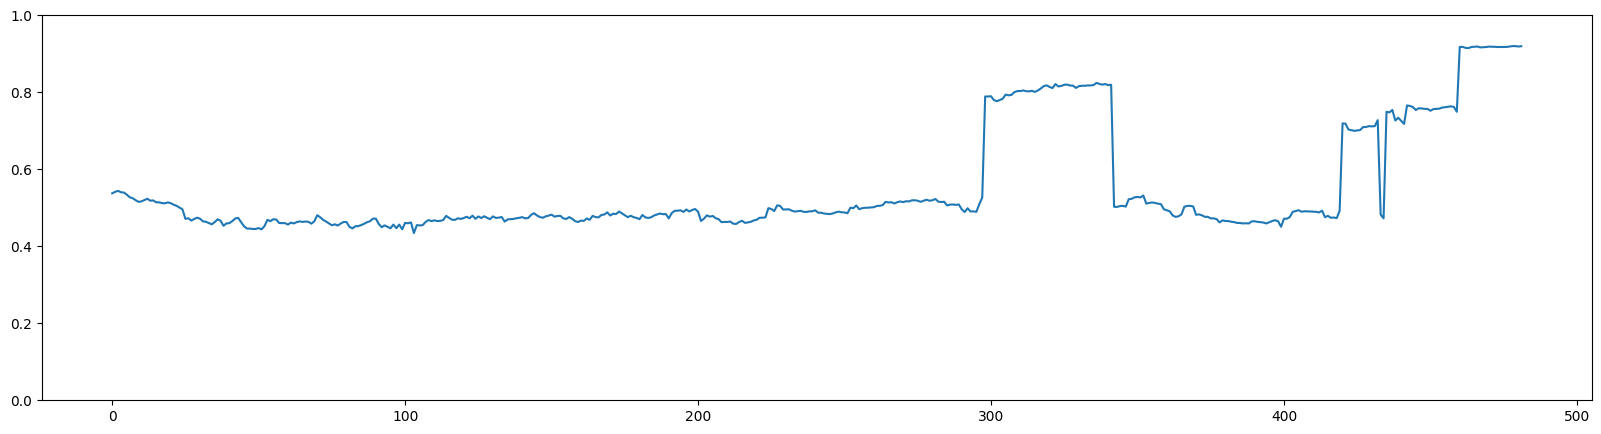

In [75]:
round_data = df.loc[(df['NUMERICAL_MATCH_ID'] == 100000) & (df['UNIVERSAL_round'] == 7)]

keep_columns = [col for col in df.columns if 
#    "_active_weapon_" not in col and
    "_inventory_" not in col and
    "_hltv_" not in col and
    "bomb_mx_pos" not in col and
    col not in ["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID", 'UNIVERSAL_round', 'UNIVERSAL_time', 'UNIVERSAL_CT_score', 'UNIVERSAL_T_score', 'UNIVERSAL_CT_losing_streak', 'UNIVERSAL_T_losing_streak',]
]

r_x = round_data[keep_columns]
r_pred = logreg.predict_proba(r_x)

fig = plt.figure(figsize=(20, 5))
plt.plot(r_pred[:,1])
plt.ylim(0, 1)

In [53]:
cdf = pd.DataFrame([df.columns, logreg.coef_[0]]).T
cdf.sort_values(by=1, ascending=False).head(40)

,0,1
851,T5_stat_kills,9.875201
157,CT0_hltv_clutches_1on1_ratio,8.442011
1343,T8_stat_MVPs,7.240225
1219,T7_inventory_FAMAS,5.271358
1503,T9_stat_kills,4.804945
206,CT1_stat_flash_assists,4.708084
391,CT2_inventory_MAC-10,4.55156
1346,T8_stat_assists,4.471651
1189,T7_stat_KPR,4.392956
793,CT4_hltv_Impact,4.306601


### XGBoost

(0.0, 1.0)

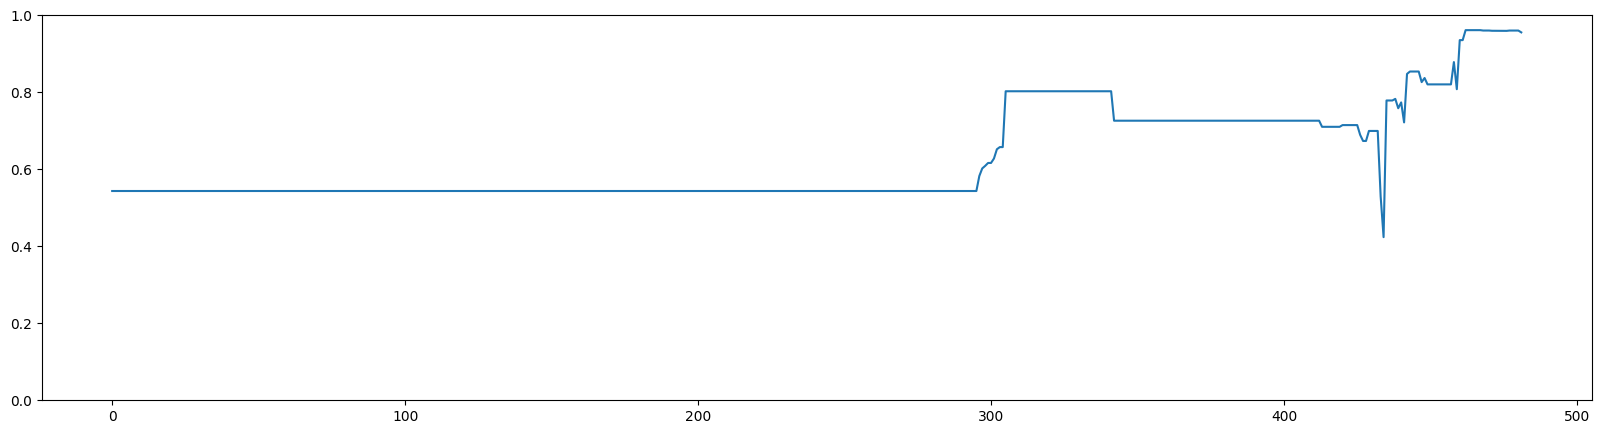

In [91]:
round_data = df.loc[(df['NUMERICAL_MATCH_ID'] == 100000) & (df['UNIVERSAL_round'] == 7)]

keep_columns = [col for col in df.columns if 
    "_inventory_" not in col and
    "_hltv_" not in col and
    "bomb_mx_pos" not in col and
    col not in ["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID", 'UNIVERSAL_round', 'UNIVERSAL_time', 'UNIVERSAL_CT_score', 'UNIVERSAL_T_score', 'UNIVERSAL_CT_losing_streak', 'UNIVERSAL_T_losing_streak',]
]

r_x = round_data[keep_columns]
r_pred = xgb.predict_proba(r_x)

fig = plt.figure(figsize=(20, 5))
plt.plot(r_pred[:,1])
plt.ylim(0, 1)

### Decision tree

(0.0, 1.0)

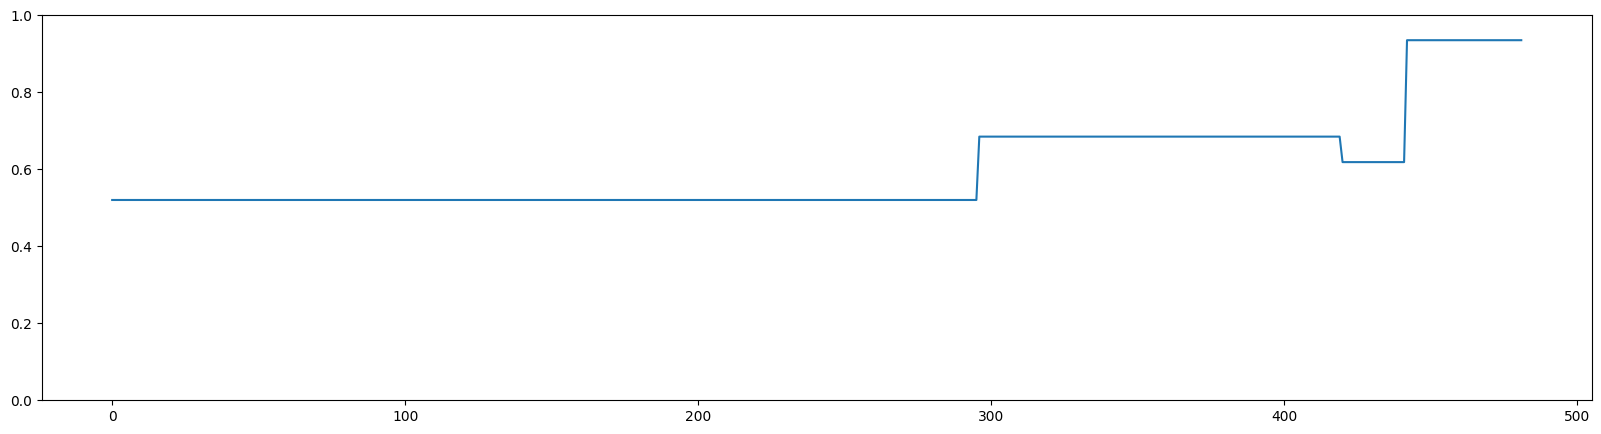

In [95]:
round_data = df.loc[(df['NUMERICAL_MATCH_ID'] == 100000) & (df['UNIVERSAL_round'] == 7)]

keep_columns = [col for col in df.columns if 
    "_inventory_" not in col and
    "_hltv_" not in col and
    "bomb_mx_pos" not in col and
    col not in ["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID", 'UNIVERSAL_round', 'UNIVERSAL_time', 'UNIVERSAL_CT_score', 'UNIVERSAL_T_score', 'UNIVERSAL_CT_losing_streak', 'UNIVERSAL_T_losing_streak',]
]

r_x = round_data[keep_columns]
r_pred = dectree.predict(r_x)

fig = plt.figure(figsize=(20, 5))
plt.plot(r_pred)
plt.ylim(0, 1)

### Random forest

(0.0, 1.0)

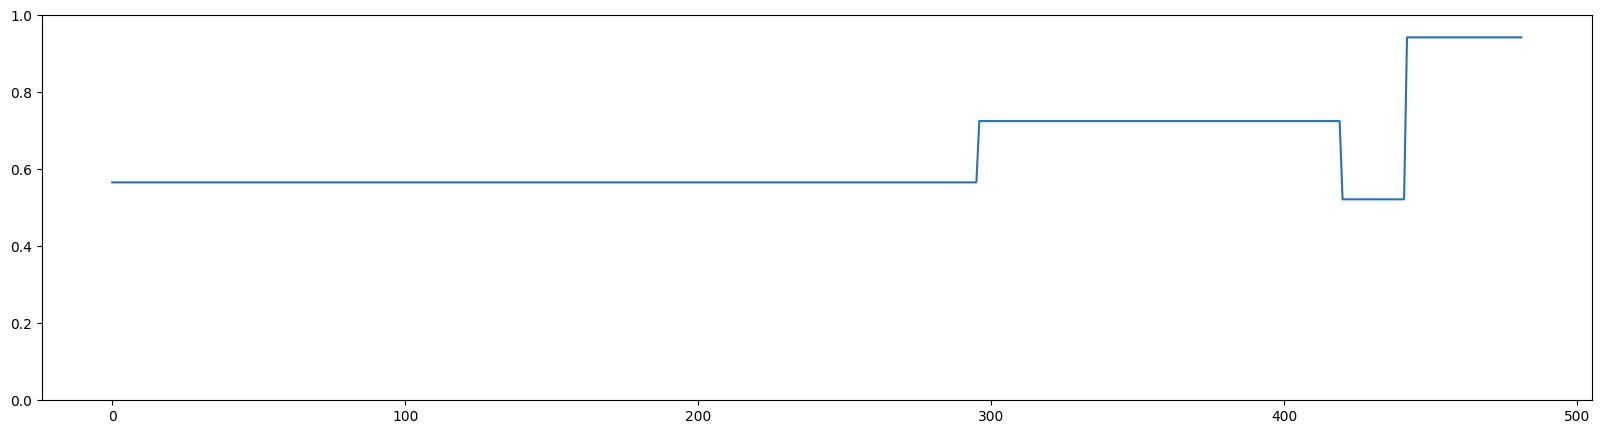

In [98]:
round_data = df.loc[(df['NUMERICAL_MATCH_ID'] == 100000) & (df['UNIVERSAL_round'] == 7)]

keep_columns = [col for col in df.columns if 
    "_inventory_" not in col and
    "_hltv_" not in col and
    "bomb_mx_pos" not in col and
    col not in ["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID", 'UNIVERSAL_round', 'UNIVERSAL_time', 'UNIVERSAL_CT_score', 'UNIVERSAL_T_score', 'UNIVERSAL_CT_losing_streak', 'UNIVERSAL_T_losing_streak',]
]

r_x = round_data[keep_columns]
r_pred = rf.predict(r_x)

fig = plt.figure(figsize=(20, 5))
plt.plot(r_pred)
plt.ylim(0, 1)